In [1]:
import sys
import os
# sys.path.append('/home/beinhaud/diplomka/mcs-source/evaluation_tools')
sys.path.append('/home/david/source/diplomka/evaluation_tools')
sys.path.append('/home/david/source/diplomka/results_analysis_tools')
from typing import List, Dict, Any, Tuple, Union

from evaluation_tools.plugins.predictions_analyzer import PredictionsAnalyzer
from evaluation_tools.plugins.wandb_processor import WandbProcessor
from evaluation_tools.fields.experiment_parameters_fields import WandbExperimentVariants, GridSearchRunVariants, ModelEvaluationRunVariant, AdditionalExperiments
from evaluation_tools.fields.prediction_analysis_fields import (
    BatchSummaryFields,
    EvaluationPairsVariants,
)
from evaluation_tools.fields.dataset_analyzer_fields import AnalysisFields, DatasetVariantField
from evaluation_tools.fields.evaluation_processor_fields import EvaluationProcessorChoices
from nn_model.type_variants import EvaluationFields
import nn_model.globals

import pandas as pd
import numpy as np

from results_analysis_tools.result_analyzer import ResultAnalyzer
from evaluation_tools.fields.dataset_parameters import ALL_TIME_STEP_VARIANTS
from results_analysis_tools.fields.experiment_analyses import (
    PlottingVariants,
    PluginVariants,
)
from results_analysis_tools.results_plotter import ResultsPlotter
from results_analysis_tools.plugins.dataset_results_processor import DatasetResultsProcessor

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d

from evaluation_tools.fields.dataset_analyzer_fields import StatisticsFields
from results_analysis_tools.plugins.histogram_processor import DatasetHistogramProcessor
from results_analysis_tools.plugins.temporal_evolution_processor import TemporalEvolutionProcessor
from results_analysis_tools.plugins.synchrony_experiments_processor import SynchronyExperimentsProcessor



In [2]:
PLOTING_DESTINATION = "/home/david/source/diplomka/thesis_plots/"
EVALUATION_RESULTS_BASE = "/analysis_results"
analysis_paths = {
    EvaluationProcessorChoices.FULL_DATASET_ANALYSIS: f"{nn_model.globals.PROJECT_ROOT}{EVALUATION_RESULTS_BASE}/{EvaluationProcessorChoices.FULL_DATASET_ANALYSIS.value}/",
    EvaluationProcessorChoices.SUBSET_DATASET_ANALYSIS: f"{nn_model.globals.PROJECT_ROOT}{EVALUATION_RESULTS_BASE}/{EvaluationProcessorChoices.SUBSET_DATASET_ANALYSIS.value}/",
    # EvaluationProcessorChoices.WANDB_ANALYSIS: f"{nn_model.globals.PROJECT_ROOT}{EVALUATION_RESULTS_BASE}/{EvaluationProcessorChoices.WANDB_ANALYSIS.value}/",
    EvaluationProcessorChoices.PREDICTION_ANALYSIS: f"{nn_model.globals.PROJECT_ROOT}{EVALUATION_RESULTS_BASE}/{EvaluationProcessorChoices.PREDICTION_ANALYSIS.value}/",
}
result_analyzer = ResultAnalyzer(analysis_paths)
all_results = result_analyzer.get_all_results



# Full Dataset Analysis

## Time Bin Spike Counts
This part of code shows how to plot the distribution of spike counts across all time bins and how to write the exact ratios.

In [10]:
result_analyzer.get_mean_spike_counts(False,).head(5)

,time_step,spike_count_bin,normalized_density
0,1,0,0.9944
1,1,1,0.0056
2,1,2,0.0000
3,1,3,0.0000
4,1,4,0.0000


In [11]:
result_analyzer.get_mean_spike_counts(True).head(5)

,time_step,spike_count_bin,normalized_density
0,1,0,0.9944
1,1,1,0.0056
2,1,2,0.0000
3,1,3,0.0000
4,1,4,0.0000


In [ ]:
is_test = False
filename = f"time_step_counts_{"test" if is_test else "train"}.pdf"
plot_data = result_analyzer.prepare_dataframe_for_plot(PlottingVariants.FULL_TIME_BIN_COUNT_RATIO, is_test=is_test)
ResultsPlotter.plot(plot_data, PlottingVariants.FULL_TIME_BIN_COUNT_RATIO, is_test=is_test, save_fig=f"{PLOTING_DESTINATION}{filename}")

In [ ]:
is_test = True
filename = f"time_step_counts_{"test" if is_test else "train"}.pdf"
plot_data = result_analyzer.prepare_dataframe_for_plot(PlottingVariants.FULL_TIME_BIN_COUNT_RATIO, is_test=is_test)
ResultsPlotter.plot(plot_data, PlottingVariants.FULL_TIME_BIN_COUNT_RATIO, is_test=is_test, save_fig=f"{PLOTING_DESTINATION}{filename}")

## Temporal Distribution of Spikes

In [ ]:
is_test = False
filename = f"temporal_spike_distribution_{"test" if is_test else "train"}.pdf"
destination = f"{PLOTING_DESTINATION}{filename}"
plot_data = result_analyzer.prepare_dataframe_for_plot(PlottingVariants.FULL_TEMPORAL_SPIKE_DISTRIBUTION, is_test=is_test)
ResultsPlotter.plot(plot_data, PlottingVariants.FULL_TEMPORAL_SPIKE_DISTRIBUTION, save_fig=destination, is_test=is_test)

In [ ]:
is_test = True
filename = f"temporal_spike_distribution_{"test" if is_test else "train"}.pdf"
destination = f"{PLOTING_DESTINATION}{filename}"
plot_data = result_analyzer.prepare_dataframe_for_plot(PlottingVariants.FULL_TEMPORAL_SPIKE_DISTRIBUTION, is_test=is_test)
ResultsPlotter.plot(plot_data, PlottingVariants.FULL_TEMPORAL_SPIKE_DISTRIBUTION, save_fig=destination, is_test=is_test)

In [ ]:
filename = "temporal_correlation_time_bin_size.pdf"
destination = f"{PLOTING_DESTINATION}{filename}"
train_corr = result_analyzer.prepare_dataframe_for_plot(PlottingVariants.FULL_CORRELATION_MATRIX_BIN_SIZE_TEMPORAL_DATASET, is_test=False)
test_corr = result_analyzer.prepare_dataframe_for_plot(PlottingVariants.FULL_CORRELATION_MATRIX_BIN_SIZE_TEMPORAL_DATASET, is_test=True)
ResultsPlotter.plot((train_corr, test_corr), PlottingVariants.FULL_CORRELATION_MATRIX_BIN_SIZE_TEMPORAL_DATASET, save_fig=destination, is_test=is_test)

## Synchrony 

Plotting of the synchrony boxplot across different time bin sizes.

In [ ]:
is_test = False
filename = f"synchrony_boxplot_time_bins_{"test" if is_test else "train"}.pdf"
destination = f"{PLOTING_DESTINATION}{filename}"
plot_data = result_analyzer.prepare_dataframe_for_plot(PlottingVariants.FULL_SYNCHRONY_TIME_BINS, is_test=is_test)
ResultsPlotter.plot(plot_data, PlottingVariants.FULL_SYNCHRONY_TIME_BINS, save_fig=destination, is_test=is_test)

In [ ]:
is_test = True
filename = f"synchrony_boxplot_time_bins_{"test" if is_test else "train"}.pdf"
destination = f"{PLOTING_DESTINATION}{filename}"
plot_data = result_analyzer.prepare_dataframe_for_plot(PlottingVariants.FULL_SYNCHRONY_TIME_BINS, is_test=is_test)
ResultsPlotter.plot(plot_data, PlottingVariants.FULL_SYNCHRONY_TIME_BINS, save_fig=destination, is_test=is_test)

In [19]:
result_analyzer.get_synchrony_summary(is_test=False, return_latex=False)

Index(['time_step', 'layer', 'statistics_type', 'values'], dtype='object')


,time_step,mean,variance
0,1,0.0101,0.0001
1,5,0.0494,0.0018
2,10,0.0912,0.0057
3,15,0.1256,0.0098
4,20,0.1551,0.0134


In [20]:
result_analyzer.get_synchrony_summary(is_test=True, return_latex=False)

Index(['time_step', 'layer', 'statistics_type', 'values'], dtype='object')


,time_step,mean,variance
0,1,0.0101,0.0001
1,5,0.0491,0.0017
2,10,0.0908,0.0057
3,15,0.1250,0.0097
4,20,0.1545,0.0133


# Subset Dataset Analysis


## Time Bin Spike Counts

In [8]:
is_test=False
result_analyzer.get_mean_spike_counts(is_test, process_subset=True)

,spike_count_bin,full_density,subset_mean,subset_std
0,0,0.9105,0.9102,0.0004
1,1,0.0710,0.0712,0.0003
2,2,0.0147,0.0148,0.0001
3,3,0.0032,0.0032,0.0000
4,4,0.0005,0.0005,0.0000
5,5,0.0001,0.0001,0.0000


## Temporal behavior comparison of Subset and Full dataset

In [ ]:
is_test = False
filename = f"temporal_distribution_subset_vs_full_{"test" if is_test else "train"}.pdf"
plot_data = result_analyzer.prepare_dataframe_for_plot(PlottingVariants.SUBSET_TEMPORAL_SPIKE_DISTRIBUTION, is_test=is_test)
ResultsPlotter.plot(plot_data, PlottingVariants.SUBSET_TEMPORAL_SPIKE_DISTRIBUTION, is_test=is_test, save_fig=f"{PLOTING_DESTINATION}{filename}")

## Synchrony Comparison

Index(['time_step', 'layer', 'statistics_type', 'values'], dtype='object')
Index(['subset_id', 'layer', 'statistics_type', 'values'], dtype='object')


/home/david/source/diplomka/results_analysis_tools/plotting/synchrony_comparison.py:99: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  strip_df = df.groupby(["layer", "model_type"]).sample(frac=1, random_state=42)


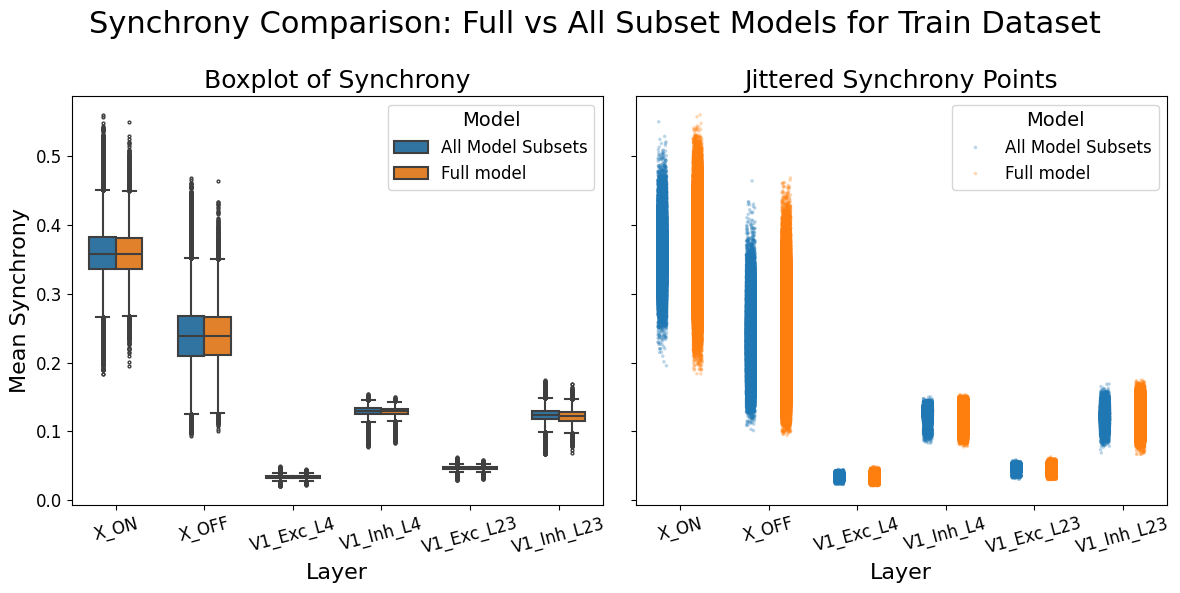

In [3]:
is_test = False
filename = f"synchrony_comparison_subset_full_{"test" if is_test else "train"}.pdf"
plot_data = result_analyzer.prepare_dataframe_for_plot(PlottingVariants.SUBSET_SYNCHRONY_TIME_BINS, is_test=is_test)
ResultsPlotter.plot(plot_data, PlottingVariants.SUBSET_SYNCHRONY_TIME_BINS, is_test=is_test, save_fig=f"{PLOTING_DESTINATION}{filename}")